In [1]:
# Generates XRD figures from imported file directory

In [4]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import py_figures_functions as pyf

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

%matplotlib notebook

In [5]:
# assign directories
path = "C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/"

cell3_operando = path + "cell3_Li3InCl6/operando_cell3/extracted_cell3_operando/extracted_d1400_cell3_operando"

cell4_operando_50uA = path + "cell4_Li2-9In0-9Zr0-1Cl6/operando_cell4/extracted_d1400_cell4_operando_50uA/xye"

cell4_operando_100uA = path + "cell4_Li2-9In0-9Zr0-1Cl6/operando_cell4/extracted_d1400_cell4_operando_100uA/xye"

cell5_operando = path + "cell5_Li2-7In0-7Zr0-3Cl6/operando_cell5_100uA/extracted_d1400_cell5_100uA/xye"

cell6_operando = path + "cell6_Li2-7Sc0-7Zr0-3Cl6/operando_cell6/extracted_d1400_cell6_operando/xye"

cell10_operando = path + "cell10_Li2-7Sc0-7Zr0-3Cl6/operando_cell10/extracted_d1400_cell10_operando"

In [6]:
# set working directory
current_dir = pyf.import_dir(cell6_operando)

# create dictionaries from XYE values
Q_dict, inten_dict, err_dict = pyf.var_dicts(current_dir, 3, isQ=True, isXYE=True)

In [7]:
# VARIABLES TO INPUT

# just plot first and last entries?
first_last = True
# include difference?
diff = True
diff_offset = 10000

# line colors
initial_color = "#962fbf"
final_color = "#00b8ff"

# offset in y-direction
offset = 100000

# tile
title = "Li$_{2.7}$Sc$_{0.7}$Zr$_{0.3}$Cl$_6$"
# title text position
title_pos = (1.1, 240000)

# x-axis label
x_label = "Q (\AA" r"$^{-1}$, $\lambda=0.458957$" ")"
# y-axis label
y_label = "Intensity (counts x $10^{3}$, offset)"

# axis limits
x_ax = (1,7.8)
y_ax = (-15000, 250000)

# reformat y axis? be sure units on axis labels are correct
reformat = True

# save a PNG image of graph? 
savePNG = False
# file name
fn = "cell6_XRD"
# save directory
save_dir = "C:/Users/sincl/Desktop/"

<IPython.core.display.Javascript object>


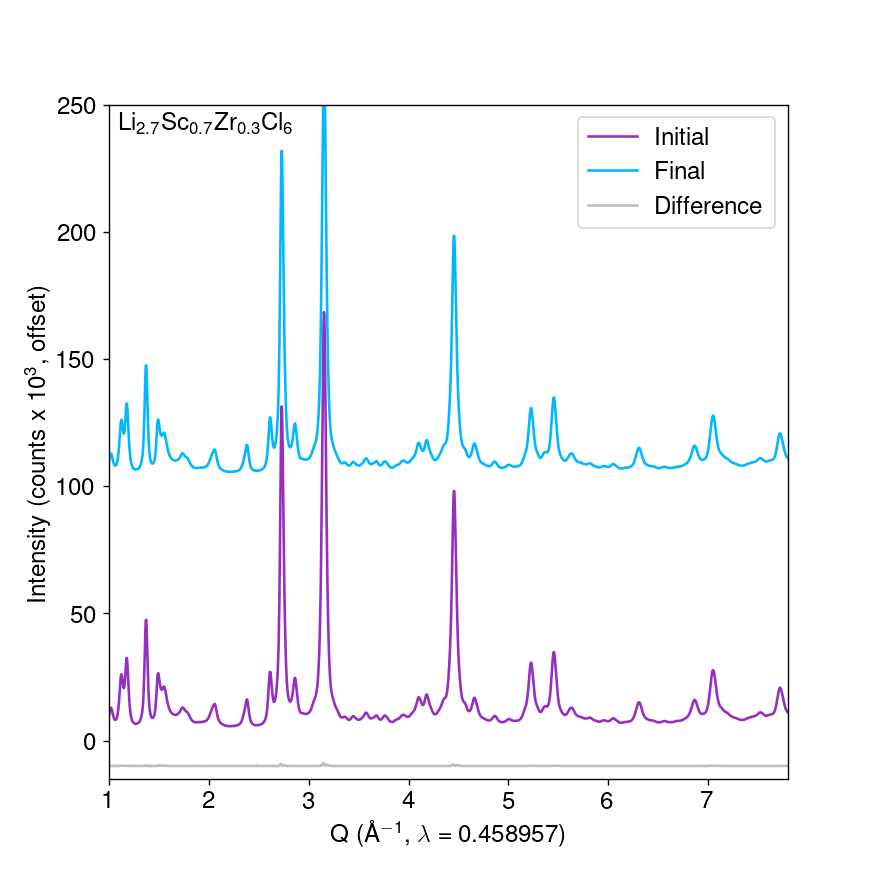

In [9]:
fig, xrd = plt.subplots(1, 1, figsize=(7,7))

dir_len = len(current_dir)
color_list = pyf.gradient_gen(initial_color, final_color, dir_len)

if first_last == True:
    xrd.plot(Q_dict[0], inten_dict[0], label="Initial", color=initial_color)
    xrd.plot(Q_dict[dir_len-1], inten_dict[dir_len-1]+offset, label="Final", color=final_color)
    if diff == True:
        y_diff = abs(inten_dict[0]-inten_dict[dir_len-1])
        xrd.plot(Q_dict[0], y_diff-diff_offset, label="Difference", color="#BEBEBE")   
    xrd.legend()
else:
    for i in dir_len:
        xrd.plot(Q_dict[i], inten_dict[i] + (offset*i), color = color_list[i].hex)

xrd.set_xlim(x_ax)
plt.ylim(y_ax)
xrd.set_xlabel(x_label)
xrd.set_ylabel(y_label)

if reformat == True:
    formatter = FuncFormatter(pyf.reformat_ticks)
    xrd.yaxis.set_major_formatter(formatter)
    yticks = xrd.yaxis.get_major_ticks()

xrd.text(title_pos[0], title_pos[1], title)

if savePNG == True:
    plt.savefig(save_dir + fn + ".png", bbox_inches='tight', dpi=1000) 